In [ ]:
!git clone https://github.com/dna-witch/KGPL-PyTorch/ -b th-dev

Cloning into 'KGPL-PyTorch'...
remote: Enumerating objects: 459, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 459 (delta 35), reused 17 (delta 17), pack-reused 400 (from 1)
Receiving objects: 100% (459/459), 15.46 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [ ]:
!pip install -r KGPL-PyTorch/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
!cd KGPL-PyTorch &&\
python preprocess/preprocess.py -d "music" &&\
python preprocess/make_path_list.py lp_depth=6 dataset=music kg_path=data/music/kg_final.npy rating_path=data/music/ratings_final.npy num_neighbor_samples=32

reading item index to entity id file: data/music/item_index2entity_id.txt ...
reading rating file ...
converting rating file ...
number of users: 1872
number of items: 3846
converting kg file ...
number of entities (containing items): 9366
number of relations: 60
done
adj_entity_path: data/music/adj_entity_6_32.npy
adj_relation_path: data/music/adj_relation_6_32.npy
data_path: data/music/fold1.pkl
dataset: music
kg_path: data/music/kg_final.npy
lp_depth: 6
num_neighbor_samples: 32
pathlist_path: data/music/path_list_6_32.pkl
rating_path: data/music/ratings_final.npy
reachable_items_path: data/music/reachable_items.pkl

[Parallel(n_jobs=32)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Batch computation too fast (0.00519251823425293s.) Setting batch_size=2.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    0.9s
[Pa

In [ ]:
import sys
sys.path.append('KGPL-PyTorch/')

In [ ]:
# from code
from model import *
from utils.data_classes import *
from utils.functions import *
from utils.eval import *

# libraries
import torch
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
music = KGPLExperiment(
    'music',
    {
      'plabel_lp_depth': 6,
      'plabel_par': 16,
      'plabel_chunk_size': 250,
      'plabel_neg_pn': 0.1,
      'plabel_pl_pn': 1e-3,
      'dropout_rate': 0.5,
      'emb_dim': 64,
      'n_iter': 1,
      'plabel': {},
      'optimize': {'iter_per_epoch': 100, 'lr': 3e-3, 'batch_size': 3333},
      'log': {'show_loss': True},
      'evaluate': {'user_num_topk': 1000},
      'model': {
          'n_iter': 1,
          'neighbor_sample_size': 32,
          'num_neighbor_samples': 32,
          'dropout_rate': 0.5}
    })

Loading Entity Adjacencies...
Loading Relation Adjacencies...
Loading Ratings...
Loading Path List...
Loading Distances...
Setting up dst dict...


100%|██████████| 3846/3846 [00:00<00:00, 10382.84it/s]

Start updating path info...
Path info updated.


In [ ]:
music.train_val_test_split()

/content/KGPL-PyTorch/utils/data_classes.py:302: RuntimeWarning: invalid value encountered in divide
  F = (F / F.sum()).cumsum()


Neg C Dict User: 1868
Neg C Dict Item: 3097


100%|██████████| 13554/13554 [00:00<00:00, 133938.35it/s]


Populating item dist dict...


8it [00:02,  2.94it/s]


In [ ]:
music.create_dataloaders()

In [ ]:
model = KGPLCOT(
        music.cfg,
        int(music.ratings[:, 0].max().item()) + 1,
        int(music.ratings[:, 1].max().item()) + 1,
        music.n_entity,
        music.n_relation,
        music.adj_entity,
        music.adj_relation,
        music.path_list_dict,
        music.train_loader,
        music.val_loader,
        'cuda'
    )

In [ ]:
def run_cotrain(model, train_loader, val_loader, test_loader, cfg, device, num_epochs=100):
    '''
    Run the CoTrain algorithm with the given model, data loaders, configuration, and device, using the "music" experiment.
    Optimizers are defined here with epsilon = 1e-7 to match tensorflow default.

    Inputs:
    - model: The CoTrain model to be trained.
    - train_loader: The data loader for the training set.
    - val_loader: The data loader for the validation set.
    - test_loader: The data loader for the test set.
    - cfg: The configuration dictionary.
    - device: PyTorch device
    - num_epochs: Training epochs

    Returns:
    - pd.DataFrame: A DataFrame containing the training loss and validation metrics for each epoch.
    '''
    optimizer_f = torch.optim.Adam(
        model.model_f.parameters(),
        lr=cfg['optimize']['lr'],
        eps=1e-7,
      )
    optimizer_g = torch.optim.Adam(
        model.model_g.parameters(),
        lr=cfg['optimize']['lr'],
        eps=1e-7,
      )
    iter_per_epoch = cfg['optimize']['iter_per_epoch']

    dataframe_rows = []

    for epoch in range(1, num_epochs + 1):
        print(f"\nEpoch {epoch}")
        model.train()
        total_loss_f, total_loss_g = 0.0, 0.0

        train_iter = iter(train_loader)  # re-initialize iterator every epoch

        for i in tqdm(range(iter_per_epoch)):
            try:
                batch = next(train_iter)
            except StopIteration:
                train_iter = iter(train_loader)
                batch = next(train_iter)

            users, pos, neg, pseudo = [b.to(device) for b in batch]
            batch_data = torch.stack([users, pos, neg, pseudo], dim=1)

            losses = model.train_step(batch_data, optimizer_f, optimizer_g)
            total_loss_f += losses['loss_f']
            total_loss_g += losses['loss_g']

        avg_loss_f = total_loss_f / iter_per_epoch
        avg_loss_g = total_loss_g / iter_per_epoch
        print(f"Train Loss - f: {avg_loss_f:.4f}, g: {avg_loss_g:.4f}")

        print("Evaluating model_f:")

        row = pd.DataFrame(
            {"Epoch": epoch,
             "Train Loss F": avg_loss_f,
             "Train Loss G": avg_loss_g
             }, index=[0])

        model.eval()

        print("Validation:")
        val_row = run_topk_eval(
          model=model,
          cfg = cfg,
          train_data=music.train_dataset.ratings.numpy(),
          eval_data=music.val_dataset.ratings.numpy(),
          test_data=music.test_dataset.ratings.numpy(),
          n_items=music.n_item,
          device=device,
          test_mode=False  # or True for test set
        ).add_prefix("Validation ")

        row = row.join(val_row)

        dataframe_rows.append(row)
    return pd.concat(dataframe_rows, ignore_index=True)

In [ ]:
results = run_cotrain(
    model,
    music.train_loader,
    music.val_loader,
    music.test_loader,
    music.cfg,
    'cuda',
    num_epochs=40
)


Epoch 1


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 5.0375, g: 5.1084
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.39it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0020 | Recall: 0.0015
K=  2 | Precision: 0.0010 | Recall: 0.0015
K=  5 | Precision: 0.0008 | Recall: 0.0019
K= 10 | Precision: 0.0006 | Recall: 0.0027
K= 20 | Precision: 0.0007 | Recall: 0.0067

Epoch 2


100%|██████████| 100/100 [01:00<00:00,  1.64it/s]


Train Loss - f: 2.2421, g: 2.2418
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 280.79it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0020 | Recall: 0.0015
K=  2 | Precision: 0.0015 | Recall: 0.0020
K=  5 | Precision: 0.0008 | Recall: 0.0022
K= 10 | Precision: 0.0004 | Recall: 0.0022
K= 20 | Precision: 0.0006 | Recall: 0.0081

Epoch 3


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.2337, g: 2.2371
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 278.44it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0010 | Recall: 0.0003
K=  2 | Precision: 0.0015 | Recall: 0.0016
K=  5 | Precision: 0.0010 | Recall: 0.0026
K= 10 | Precision: 0.0010 | Recall: 0.0051
K= 20 | Precision: 0.0009 | Recall: 0.0101

Epoch 4


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.2308, g: 2.2298
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.88it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0010 | Recall: 0.0003
K=  2 | Precision: 0.0005 | Recall: 0.0003
K=  5 | Precision: 0.0004 | Recall: 0.0008
K= 10 | Precision: 0.0006 | Recall: 0.0022
K= 20 | Precision: 0.0006 | Recall: 0.0054

Epoch 5


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.2288, g: 2.2302
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.93it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0000 | Recall: 0.0000
K=  5 | Precision: 0.0002 | Recall: 0.0003
K= 10 | Precision: 0.0003 | Recall: 0.0010
K= 20 | Precision: 0.0004 | Recall: 0.0043

Epoch 6


100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


Train Loss - f: 2.2204, g: 2.2191
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 281.77it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0010 | Recall: 0.0010
K=  2 | Precision: 0.0015 | Recall: 0.0018
K=  5 | Precision: 0.0008 | Recall: 0.0022
K= 10 | Precision: 0.0009 | Recall: 0.0053
K= 20 | Precision: 0.0008 | Recall: 0.0083

Epoch 7


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.2144, g: 2.2104
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.01it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0010 | Recall: 0.0010
K=  2 | Precision: 0.0010 | Recall: 0.0020
K=  5 | Precision: 0.0006 | Recall: 0.0025
K= 10 | Precision: 0.0005 | Recall: 0.0032
K= 20 | Precision: 0.0006 | Recall: 0.0067

Epoch 8


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 2.1991, g: 2.2006
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 278.03it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0005 | Recall: 0.0005
K=  5 | Precision: 0.0008 | Recall: 0.0022
K= 10 | Precision: 0.0007 | Recall: 0.0035
K= 20 | Precision: 0.0007 | Recall: 0.0065

Epoch 9


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.1859, g: 2.1890
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.55it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0015 | Recall: 0.0020
K=  5 | Precision: 0.0010 | Recall: 0.0035
K= 10 | Precision: 0.0006 | Recall: 0.0038
K= 20 | Precision: 0.0006 | Recall: 0.0056

Epoch 10


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.1723, g: 2.1730
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 271.77it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0010 | Recall: 0.0003
K=  2 | Precision: 0.0005 | Recall: 0.0003
K=  5 | Precision: 0.0004 | Recall: 0.0008
K= 10 | Precision: 0.0006 | Recall: 0.0024
K= 20 | Precision: 0.0007 | Recall: 0.0055

Epoch 11


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.1552, g: 2.1525
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.42it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0000 | Recall: 0.0000
K=  5 | Precision: 0.0002 | Recall: 0.0010
K= 10 | Precision: 0.0008 | Recall: 0.0046
K= 20 | Precision: 0.0008 | Recall: 0.0077

Epoch 12


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.1327, g: 2.1307
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.35it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0005 | Recall: 0.0003
K=  5 | Precision: 0.0004 | Recall: 0.0005
K= 10 | Precision: 0.0007 | Recall: 0.0026
K= 20 | Precision: 0.0007 | Recall: 0.0054

Epoch 13


100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


Train Loss - f: 2.1168, g: 2.1091
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.55it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0000 | Recall: 0.0000
K=  5 | Precision: 0.0006 | Recall: 0.0013
K= 10 | Precision: 0.0005 | Recall: 0.0018
K= 20 | Precision: 0.0009 | Recall: 0.0066

Epoch 14


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 2.0975, g: 2.0920
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.58it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0040 | Recall: 0.0018
K=  2 | Precision: 0.0030 | Recall: 0.0038
K=  5 | Precision: 0.0026 | Recall: 0.0071
K= 10 | Precision: 0.0022 | Recall: 0.0108
K= 20 | Precision: 0.0019 | Recall: 0.0193

Epoch 15


100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


Train Loss - f: 2.0794, g: 2.0680
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.49it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0020 | Recall: 0.0010
K=  2 | Precision: 0.0035 | Recall: 0.0048
K=  5 | Precision: 0.0028 | Recall: 0.0076
K= 10 | Precision: 0.0025 | Recall: 0.0138
K= 20 | Precision: 0.0020 | Recall: 0.0206

Epoch 16


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 2.0596, g: 2.0517
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.28it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0030 | Recall: 0.0012
K=  2 | Precision: 0.0035 | Recall: 0.0037
K=  5 | Precision: 0.0034 | Recall: 0.0086
K= 10 | Precision: 0.0028 | Recall: 0.0145
K= 20 | Precision: 0.0030 | Recall: 0.0271

Epoch 17


100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


Train Loss - f: 2.0421, g: 2.0352
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 270.38it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0060 | Recall: 0.0034
K=  2 | Precision: 0.0075 | Recall: 0.0072
K=  5 | Precision: 0.0074 | Recall: 0.0169
K= 10 | Precision: 0.0057 | Recall: 0.0271
K= 20 | Precision: 0.0050 | Recall: 0.0444

Epoch 18


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 2.0202, g: 2.0086
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.11it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0110 | Recall: 0.0067
K=  2 | Precision: 0.0115 | Recall: 0.0118
K=  5 | Precision: 0.0102 | Recall: 0.0260
K= 10 | Precision: 0.0081 | Recall: 0.0399
K= 20 | Precision: 0.0066 | Recall: 0.0625

Epoch 19


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 2.0017, g: 1.9923
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 273.87it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0140 | Recall: 0.0066
K=  2 | Precision: 0.0125 | Recall: 0.0105
K=  5 | Precision: 0.0116 | Recall: 0.0258
K= 10 | Precision: 0.0100 | Recall: 0.0444
K= 20 | Precision: 0.0087 | Recall: 0.0814

Epoch 20


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.9800, g: 1.9733
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.81it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0170 | Recall: 0.0075
K=  2 | Precision: 0.0180 | Recall: 0.0189
K=  5 | Precision: 0.0160 | Recall: 0.0405
K= 10 | Precision: 0.0127 | Recall: 0.0616
K= 20 | Precision: 0.0114 | Recall: 0.1107

Epoch 21


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.9617, g: 1.9539
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 278.35it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0260 | Recall: 0.0122
K=  2 | Precision: 0.0205 | Recall: 0.0198
K=  5 | Precision: 0.0182 | Recall: 0.0455
K= 10 | Precision: 0.0155 | Recall: 0.0764
K= 20 | Precision: 0.0121 | Recall: 0.1211

Epoch 22


100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


Train Loss - f: 1.9491, g: 1.9443
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 272.82it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0190 | Recall: 0.0098
K=  2 | Precision: 0.0145 | Recall: 0.0148
K=  5 | Precision: 0.0156 | Recall: 0.0404
K= 10 | Precision: 0.0155 | Recall: 0.0767
K= 20 | Precision: 0.0127 | Recall: 0.1210

Epoch 23


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.9390, g: 1.9302
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.16it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0230 | Recall: 0.0099
K=  2 | Precision: 0.0225 | Recall: 0.0222
K=  5 | Precision: 0.0210 | Recall: 0.0459
K= 10 | Precision: 0.0188 | Recall: 0.0875
K= 20 | Precision: 0.0145 | Recall: 0.1365

Epoch 24


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.9255, g: 1.9178
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.81it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0250 | Recall: 0.0144
K=  2 | Precision: 0.0240 | Recall: 0.0238
K=  5 | Precision: 0.0228 | Recall: 0.0553
K= 10 | Precision: 0.0187 | Recall: 0.0935
K= 20 | Precision: 0.0149 | Recall: 0.1510

Epoch 25


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.9124, g: 1.9087
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.11it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0260 | Recall: 0.0110
K=  2 | Precision: 0.0275 | Recall: 0.0270
K=  5 | Precision: 0.0238 | Recall: 0.0566
K= 10 | Precision: 0.0203 | Recall: 0.0981
K= 20 | Precision: 0.0161 | Recall: 0.1540

Epoch 26


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.9030, g: 1.8951
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.83it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0240 | Recall: 0.0130
K=  2 | Precision: 0.0235 | Recall: 0.0231
K=  5 | Precision: 0.0248 | Recall: 0.0589
K= 10 | Precision: 0.0214 | Recall: 0.1018
K= 20 | Precision: 0.0169 | Recall: 0.1618

Epoch 27


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8935, g: 1.8901
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.31it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0230 | Recall: 0.0117
K=  2 | Precision: 0.0250 | Recall: 0.0264
K=  5 | Precision: 0.0218 | Recall: 0.0539
K= 10 | Precision: 0.0195 | Recall: 0.0919
K= 20 | Precision: 0.0168 | Recall: 0.1581

Epoch 28


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8837, g: 1.8812
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.08it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0160 | Recall: 0.0077
K=  2 | Precision: 0.0225 | Recall: 0.0206
K=  5 | Precision: 0.0208 | Recall: 0.0493
K= 10 | Precision: 0.0184 | Recall: 0.0905
K= 20 | Precision: 0.0152 | Recall: 0.1437

Epoch 29


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8780, g: 1.8706
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.28it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0250 | Recall: 0.0132
K=  2 | Precision: 0.0265 | Recall: 0.0271
K=  5 | Precision: 0.0252 | Recall: 0.0613
K= 10 | Precision: 0.0234 | Recall: 0.1118
K= 20 | Precision: 0.0185 | Recall: 0.1739

Epoch 30


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8653, g: 1.8663
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 279.59it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0260 | Recall: 0.0122
K=  2 | Precision: 0.0240 | Recall: 0.0228
K=  5 | Precision: 0.0228 | Recall: 0.0567
K= 10 | Precision: 0.0225 | Recall: 0.1071
K= 20 | Precision: 0.0183 | Recall: 0.1710

Epoch 31


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.8602, g: 1.8578
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 277.97it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0250 | Recall: 0.0125
K=  2 | Precision: 0.0235 | Recall: 0.0250
K=  5 | Precision: 0.0208 | Recall: 0.0515
K= 10 | Precision: 0.0196 | Recall: 0.0922
K= 20 | Precision: 0.0161 | Recall: 0.1538

Epoch 32


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.8584, g: 1.8532
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 278.15it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0230 | Recall: 0.0099
K=  2 | Precision: 0.0255 | Recall: 0.0254
K=  5 | Precision: 0.0246 | Recall: 0.0595
K= 10 | Precision: 0.0205 | Recall: 0.0971
K= 20 | Precision: 0.0170 | Recall: 0.1656

Epoch 33


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8483, g: 1.8537
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 278.40it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0200 | Recall: 0.0095
K=  2 | Precision: 0.0230 | Recall: 0.0226
K=  5 | Precision: 0.0216 | Recall: 0.0544
K= 10 | Precision: 0.0196 | Recall: 0.0917
K= 20 | Precision: 0.0163 | Recall: 0.1550

Epoch 34


100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


Train Loss - f: 1.8423, g: 1.8434
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.78it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0250 | Recall: 0.0109
K=  2 | Precision: 0.0255 | Recall: 0.0247
K=  5 | Precision: 0.0236 | Recall: 0.0575
K= 10 | Precision: 0.0198 | Recall: 0.0931
K= 20 | Precision: 0.0167 | Recall: 0.1592

Epoch 35


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8366, g: 1.8397
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 275.86it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0220 | Recall: 0.0090
K=  2 | Precision: 0.0225 | Recall: 0.0211
K=  5 | Precision: 0.0222 | Recall: 0.0548
K= 10 | Precision: 0.0217 | Recall: 0.1044
K= 20 | Precision: 0.0163 | Recall: 0.1534

Epoch 36


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Train Loss - f: 1.8329, g: 1.8297
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.88it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0260 | Recall: 0.0135
K=  2 | Precision: 0.0255 | Recall: 0.0248
K=  5 | Precision: 0.0248 | Recall: 0.0588
K= 10 | Precision: 0.0228 | Recall: 0.1114
K= 20 | Precision: 0.0185 | Recall: 0.1786

Epoch 37


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.8286, g: 1.8267
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 279.20it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0280 | Recall: 0.0126
K=  2 | Precision: 0.0275 | Recall: 0.0266
K=  5 | Precision: 0.0236 | Recall: 0.0580
K= 10 | Precision: 0.0212 | Recall: 0.0996
K= 20 | Precision: 0.0174 | Recall: 0.1622

Epoch 38


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.8198, g: 1.8219
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 276.84it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0270 | Recall: 0.0120
K=  2 | Precision: 0.0235 | Recall: 0.0219
K=  5 | Precision: 0.0244 | Recall: 0.0561
K= 10 | Precision: 0.0205 | Recall: 0.0935
K= 20 | Precision: 0.0161 | Recall: 0.1475

Epoch 39


100%|██████████| 100/100 [01:01<00:00,  1.61it/s]


Train Loss - f: 1.8200, g: 1.8195
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.69it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0250 | Recall: 0.0127
K=  2 | Precision: 0.0245 | Recall: 0.0246
K=  5 | Precision: 0.0238 | Recall: 0.0598
K= 10 | Precision: 0.0204 | Recall: 0.1021
K= 20 | Precision: 0.0161 | Recall: 0.1578

Epoch 40


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Train Loss - f: 1.8126, g: 1.8124
Evaluating model_f:
Validation:


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 274.40it/s]


Top-K Evaluation Results
K=  1 | Precision: 0.0370 | Recall: 0.0184
K=  2 | Precision: 0.0330 | Recall: 0.0339
K=  5 | Precision: 0.0264 | Recall: 0.0618
K= 10 | Precision: 0.0205 | Recall: 0.0938
K= 20 | Precision: 0.0166 | Recall: 0.1531


Text(0.5, 1.0, 'Validation Recall of Model F')

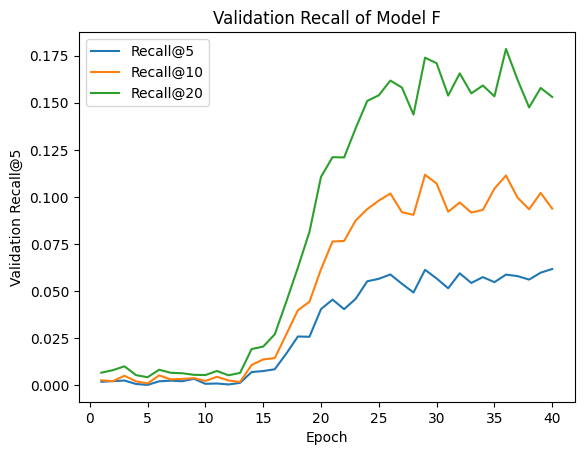

In [ ]:
sns.lineplot(results, x='Epoch', y='Validation Recall@5', label='Recall@5')
sns.lineplot(results, x='Epoch', y='Validation Recall@10', label='Recall@10')
sns.lineplot(results, x='Epoch', y='Validation Recall@20', label='Recall@20')
plt.title('Validation Recall of Model F')

Text(0.5, 1.0, 'Train Loss of Model F')

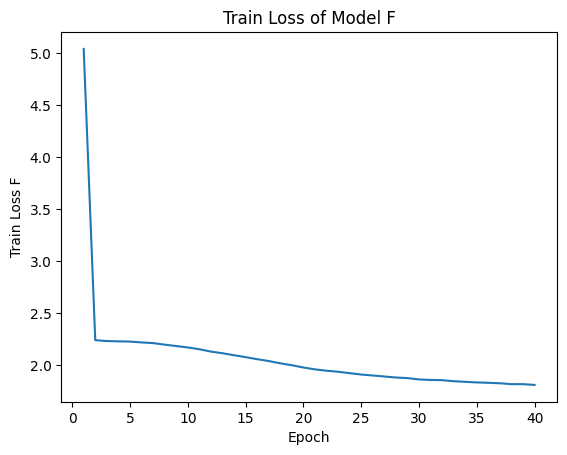

In [ ]:
sns.lineplot(results, x='Epoch', y='Train Loss F')
plt.title('Train Loss of Model F')

In [ ]:
# Get unique values and their counts
unique_users, counts = torch.unique(music.train_dataset.ratings[:,0], return_counts=True)

In [ ]:
print('All Users:', len(unique_users), '\n')

cold_starts = pd.Series(range(1,11), name='Cold Start Values')

cold_start_rows = []

for i in cold_starts:
  # Select values with count <= i
  cold_start_rows.append(cold_start_eval(model, music, i, 'cuda'))
  print('\n')

All Users: 1868 

Cold Starters <= 1: 23


Evaluating: 100%|██████████| 18/18 [00:00<00:00, 283.42it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0000 | Recall: 0.0000
K=  2 | Precision: 0.0000 | Recall: 0.0000
K=  5 | Precision: 0.0000 | Recall: 0.0000
K= 10 | Precision: 0.0000 | Recall: 0.0000
K= 20 | Precision: 0.0056 | Recall: 0.0833


Cold Starters <= 2: 80


Evaluating: 100%|██████████| 61/61 [00:00<00:00, 281.72it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0656 | Recall: 0.0230
K=  2 | Precision: 0.0574 | Recall: 0.0434
K=  5 | Precision: 0.0557 | Recall: 0.1046
K= 10 | Precision: 0.0361 | Recall: 0.1311
K= 20 | Precision: 0.0238 | Recall: 0.2033


Cold Starters <= 3: 172


Evaluating: 100%|██████████| 141/141 [00:00<00:00, 282.85it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0426 | Recall: 0.0170
K=  2 | Precision: 0.0390 | Recall: 0.0330
K=  5 | Precision: 0.0383 | Recall: 0.0717
K= 10 | Precision: 0.0284 | Recall: 0.1128
K= 20 | Precision: 0.0216 | Recall: 0.1966


Cold Starters <= 4: 342


Evaluating: 100%|██████████| 294/294 [00:01<00:00, 274.75it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0374 | Recall: 0.0144
K=  2 | Precision: 0.0459 | Recall: 0.0457
K=  5 | Precision: 0.0422 | Recall: 0.0902
K= 10 | Precision: 0.0320 | Recall: 0.1389
K= 20 | Precision: 0.0245 | Recall: 0.2185


Cold Starters <= 5: 563


Evaluating: 100%|██████████| 493/493 [00:01<00:00, 285.71it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0446 | Recall: 0.0172
K=  2 | Precision: 0.0456 | Recall: 0.0415
K=  5 | Precision: 0.0389 | Recall: 0.0787
K= 10 | Precision: 0.0320 | Recall: 0.1296
K= 20 | Precision: 0.0245 | Recall: 0.2046


Cold Starters <= 6: 769


Evaluating: 100%|██████████| 684/684 [00:02<00:00, 287.12it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0482 | Recall: 0.0207
K=  2 | Precision: 0.0439 | Recall: 0.0411
K=  5 | Precision: 0.0371 | Recall: 0.0764
K= 10 | Precision: 0.0313 | Recall: 0.1281
K= 20 | Precision: 0.0238 | Recall: 0.1965


Cold Starters <= 7: 1034


Evaluating: 100%|██████████| 922/922 [00:03<00:00, 284.84it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0531 | Recall: 0.0232
K=  2 | Precision: 0.0456 | Recall: 0.0448
K=  5 | Precision: 0.0388 | Recall: 0.0822
K= 10 | Precision: 0.0311 | Recall: 0.1288
K= 20 | Precision: 0.0238 | Recall: 0.1995


Cold Starters <= 8: 1286


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 287.92it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0480 | Recall: 0.0211
K=  2 | Precision: 0.0450 | Recall: 0.0441
K=  5 | Precision: 0.0386 | Recall: 0.0831
K= 10 | Precision: 0.0304 | Recall: 0.1290
K= 20 | Precision: 0.0233 | Recall: 0.1958


Cold Starters <= 9: 1471


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 287.80it/s]



Top-K Evaluation Results
K=  1 | Precision: 0.0510 | Recall: 0.0245
K=  2 | Precision: 0.0450 | Recall: 0.0460
K=  5 | Precision: 0.0372 | Recall: 0.0823
K= 10 | Precision: 0.0302 | Recall: 0.1310
K= 20 | Precision: 0.0226 | Recall: 0.1944


Cold Starters <= 10: 1607


Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 284.35it/s]


Top-K Evaluation Results
K=  1 | Precision: 0.0390 | Recall: 0.0191
K=  2 | Precision: 0.0395 | Recall: 0.0413
K=  5 | Precision: 0.0334 | Recall: 0.0767
K= 10 | Precision: 0.0281 | Recall: 0.1265
K= 20 | Precision: 0.0214 | Recall: 0.1886




In [ ]:
# Cold Start Test Set
cold_starts.to_frame().join(pd.concat(cold_start_rows, ignore_index=True))

,Cold Start Values,Precision@1,Recall@1,Precision@2,Recall@2,Precision@5,Recall@5,Precision@10,Recall@10,Precision@20,Recall@20
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005556,0.083333
1,2,0.065574,0.022951,0.057377,0.043443,0.055738,0.104645,0.036066,0.131148,0.023770,0.203279
2,3,0.042553,0.017021,0.039007,0.032979,0.038298,0.071749,0.028369,0.112766,0.021631,0.196572
3,4,0.037415,0.014399,0.045918,0.045692,0.042177,0.090193,0.031973,0.138889,0.024490,0.218481
4,5,0.044625,0.017208,0.045639,0.041515,0.038945,0.078654,0.032049,0.129552,0.024544,0.204622
5,6,0.048246,0.020687,0.043860,0.041131,0.037135,0.076427,0.031287,0.128112,0.023757,0.196477
6,7,0.053145,0.023247,0.045553,0.044830,0.038829,0.082161,0.031128,0.128778,0.023807,0.199484
7,8,0.048000,0.021133,0.045000,0.044067,0.038600,0.083093,0.030400,0.128981,0.023300,0.195845
8,9,0.051000,0.024500,0.045000,0.045983,0.037200,0.082311,0.030200,0.131046,0.022550,0.194440
9,10,0.039000,0.019133,0.039500,0.041283,0.033400,0.076677,0.028100,0.126523,0.021400,0.188636


In [ ]:
# Overall Test Set Evaluation
run_topk_eval(
          model=model,
          cfg = music.cfg,
          train_data=music.train_dataset.ratings.numpy(),
          eval_data=music.val_dataset.ratings.numpy(),
          test_data=music.test_dataset.ratings.numpy(),
          n_items=music.n_item,
          device='cuda',
          test_mode=True  # or True for test set
        )

Evaluating: 100%|██████████| 1000/1000 [00:03<00:00, 287.00it/s]


Top-K Evaluation Results
K=  1 | Precision: 0.0390 | Recall: 0.0191
K=  2 | Precision: 0.0360 | Recall: 0.0363
K=  5 | Precision: 0.0304 | Recall: 0.0707
K= 10 | Precision: 0.0279 | Recall: 0.1236
K= 20 | Precision: 0.0203 | Recall: 0.1762


,Precision@1,Recall@1,Precision@2,Recall@2,Precision@5,Recall@5,Precision@10,Recall@10,Precision@20,Recall@20
0,0.039,0.0191,0.036,0.036283,0.0304,0.070712,0.0279,0.12361,0.02025,0.176175
